### Case 1: Uniform abrasion

Text(0, 0.5, 'Nb of particles')

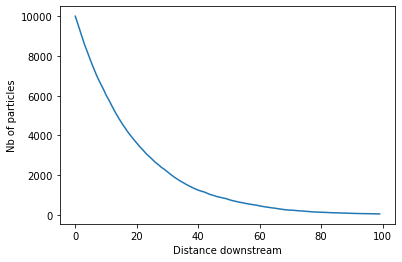

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random

ini_particles = 10000
P_absrasion = 0.05
nb_cells = 100
distance = np.linspace(0,nb_cells-1,nb_cells)
abrasion_change_particles = np.ones(ini_particles)*P_absrasion

nb_particles = np.zeros_like(distance)
nb_particles[0] = ini_particles

for ind in range(nb_cells):
    if ind < nb_cells-1:
        to_remove = np.where(np.random.rand(len(abrasion_change_particles))<abrasion_change_particles)        
        abrasion_change_particles = np.delete(abrasion_change_particles,to_remove)
        nb_particles[ind+1] = len(abrasion_change_particles)

plt.plot(distance, nb_particles)
plt.xlabel('Distance downstream')
plt.ylabel('Nb of particles')

### Case 2: Variable abrasion

0.05006218820938576


Text(0, 0.5, 'Nb of particles')

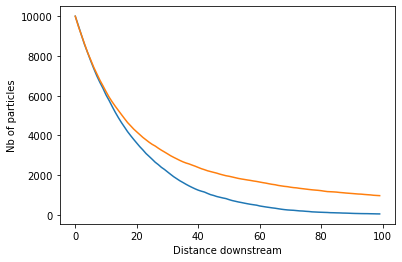

In [2]:
distance = np.linspace(0,nb_cells-1,nb_cells)
rand_values = np.random.rand(ini_particles)*P_absrasion*2
abrasion_change_particles = rand_values
print(np.mean(abrasion_change_particles))

nb_particles_case2 = np.zeros_like(distance)
nb_particles_case2[0] = ini_particles

mean_probability = np.zeros_like(distance)
mean_probability[0] = np.mean(abrasion_change_particles)

for ind in range(nb_cells):
    if ind < nb_cells-1:
        
        to_remove = np.where(np.random.rand(len(abrasion_change_particles))<abrasion_change_particles)        
        abrasion_change_particles = np.delete(abrasion_change_particles,to_remove)
        nb_particles_case2[ind+1] = len(abrasion_change_particles)
        mean_probability[ind+1] = np.mean(abrasion_change_particles)
        
        #Plotting
#         if np.mod(ind,20)==0:
#             plt.hist(abrasion_change_particles, range=[0, .1])
#             plt.title(ind)
#             plt.show()
        



plt.plot(distance, nb_particles)
plt.plot(distance, nb_particles_case2)
plt.xlabel('Distance downstream')
plt.ylabel('Nb of particles')

### Plot combined

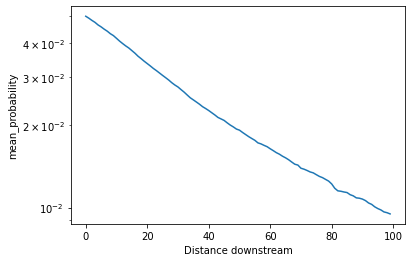

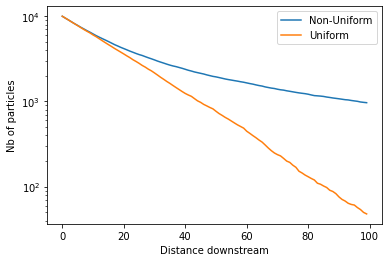

In [3]:
plt.plot(distance, mean_probability)
plt.yscale('log')
plt.xlabel('Distance downstream')
plt.ylabel('mean_probability')


plt.figure()
plt.plot(distance, nb_particles_case2, label = 'Non-Uniform')
plt.plot(distance, nb_particles, label = 'Uniform')
plt.xlabel('Distance downstream')
plt.ylabel('Nb of particles')
# plt.xscale('log')
plt.yscale('log')
plt.legend()

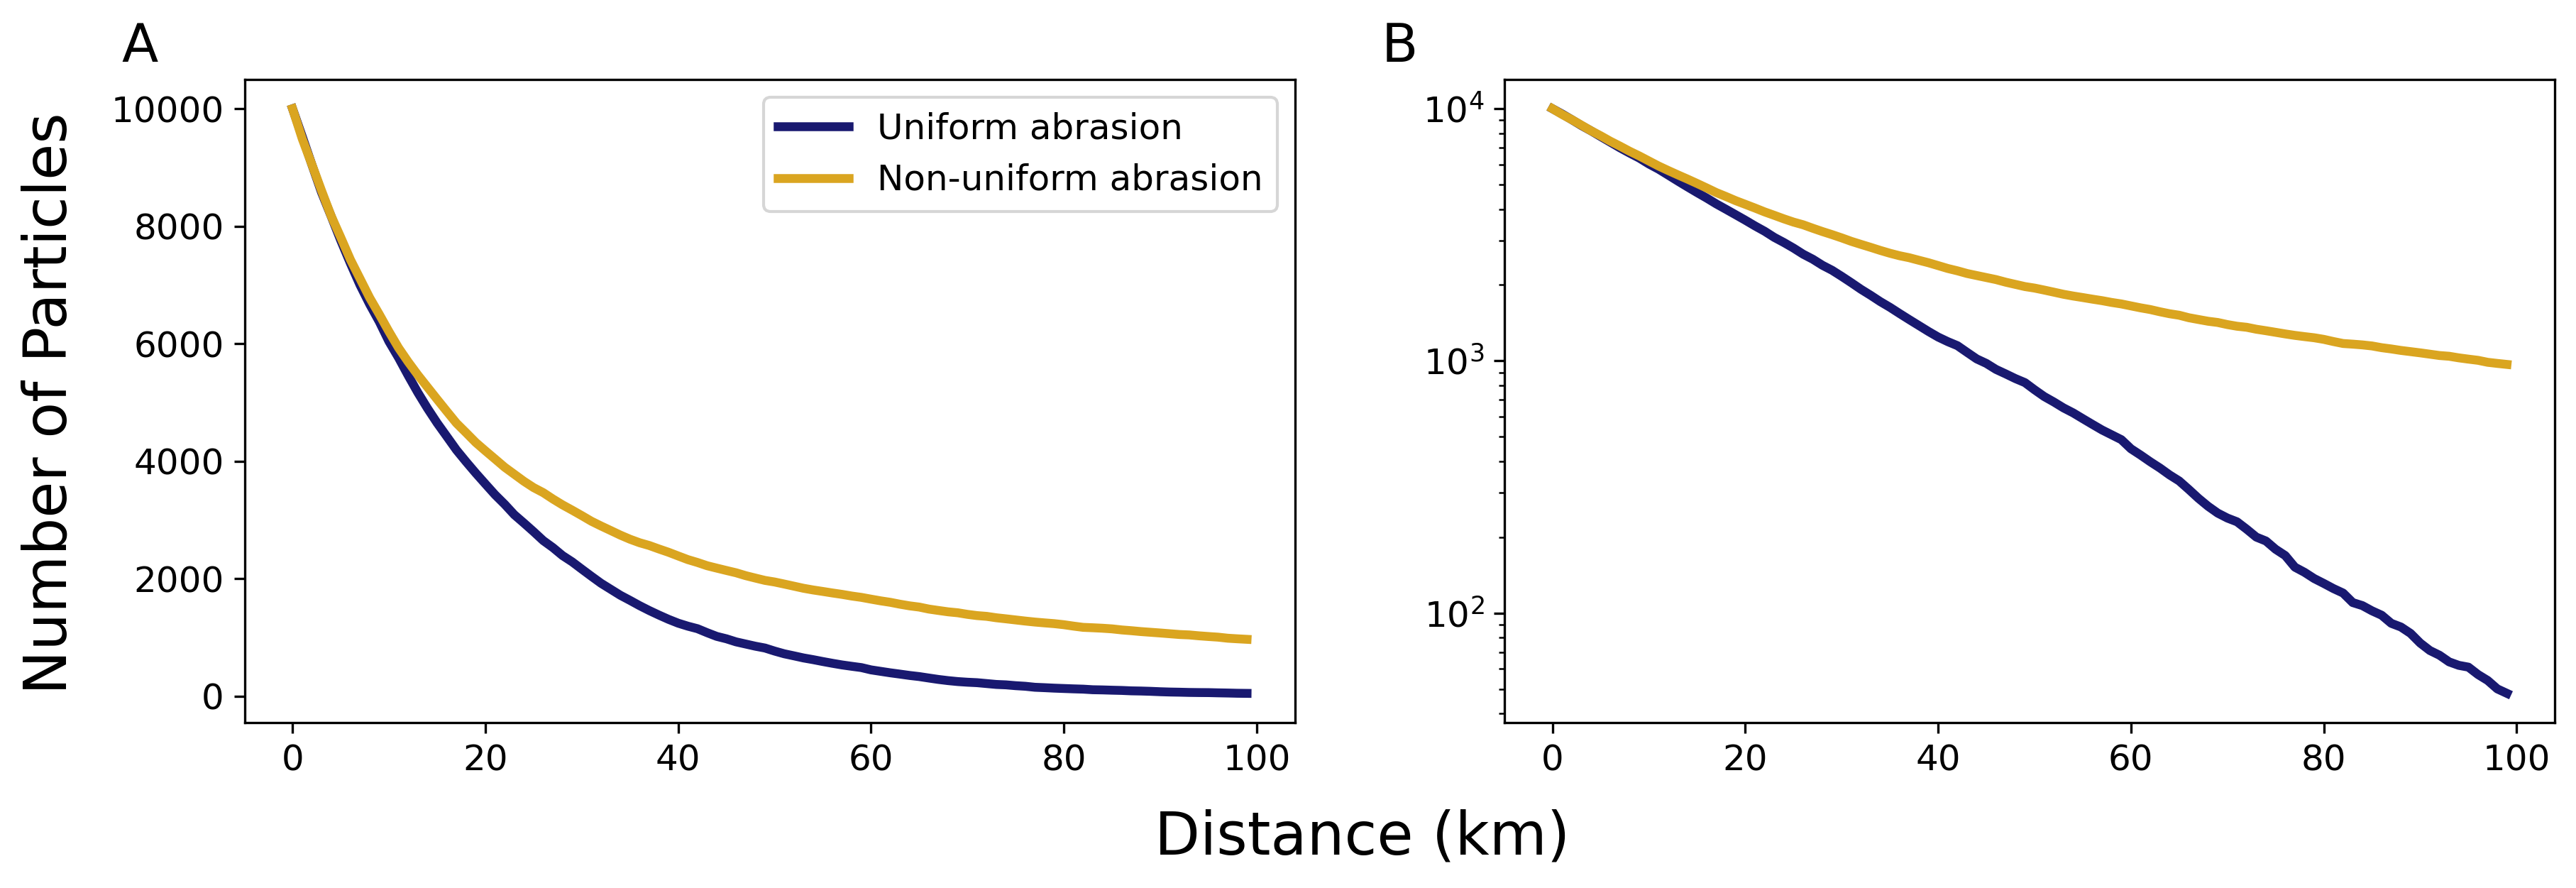

In [4]:
plt.rcParams['figure.dpi'] = 300
fig, axs = plt.subplots(1, 2, figsize = (14, 4))

fig.text(0.5, -0.03, 'Distance (km)', ha='center', fontsize = 20)
fig.text(0.05, 0.5, 'Number of Particles', va='center', rotation='vertical', fontsize = 20)

axs[0].plot(distance, nb_particles, label = 'Uniform abrasion', color = 'midnightblue', linewidth = 3)
axs[0].plot(distance, nb_particles_case2, label = 'Non-uniform abrasion', color = 'goldenrod', linewidth = 3)
axs[0].legend(fontsize = 12)
axs[0].set_title('A', fontsize = 18, x=-0.1,y=1.0)
axs[0].tick_params(axis="x", labelsize=12) 
axs[0].tick_params(axis="y", labelsize=12)

axs[1].plot(distance, nb_particles, color = 'midnightblue', linewidth = 3)
axs[1].plot(distance, nb_particles_case2, color = 'goldenrod', linewidth = 3)
axs[1].set_yscale('log')
axs[1].set_title('B', fontsize = 18, x=-0.1,y=1.0)
axs[1].tick_params(axis="x", labelsize=12) 
axs[1].tick_params(axis="y", labelsize=12)

plt.savefig('variable_abrasion.png', transparent = True, bbox_inches='tight')